In [28]:
import pandas as pd
import matplotlib as plt

In [2]:
df_date=pd.read_csv('Downloads\dim_date.csv')

In [3]:
df_date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [5]:
df_state=pd.read_csv('Downloads\electric_vehicle_sales_by_state.csv')
df_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [8]:
 df_state.state.unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

## Replacing "Andaman & Nicobar" with "Andaman & Nicobar Island" ##

In [9]:
df_state = df_state.replace("Andaman & Nicobar","Andaman & Nicobar Island")

In [11]:
df_state.state.unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh', 'Haryana',
       'Jharkhand', 'Andhra Pradesh', 'Goa', 'Gujarat', 'Karnataka',
       'Kerala', 'Maharashtra', 'Rajasthan', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

## Merging State table with Date table ##

In [12]:
df_state =pd.merge(df_state,df_date,on="date")

In [13]:
df_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-Apr-21,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1
3,01-Apr-21,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1
4,01-Apr-21,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1


## Makers Table ##

In [6]:
df_makers = pd.read_csv('Downloads\electric_vehicle_sales_by_makers.csv')
df_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


## Merging Makers table with Date Table##

In [14]:
df_makers =pd.merge(df_makers,df_date,on="date")
df_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-21,4-Wheelers,BYD India,0,2022,Q1
2,01-Apr-21,4-Wheelers,PCA Automobiles,0,2022,Q1
3,01-Apr-21,4-Wheelers,BMW India,0,2022,Q1
4,01-Apr-21,4-Wheelers,Volvo Auto India,0,2022,Q1


## 1. Top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold. ##

In [21]:
df_2Wheelers_2023 = df_makers[(df_makers["fiscal_year"]==2023) & (df_makers["vehicle_category"]=="2-Wheelers")]

In [23]:
df_2Wheelers_2023.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
22,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
33,01-Apr-22,2-Wheelers,OLA ELECTRIC,13601,2023,Q1
34,01-Apr-22,2-Wheelers,OKINAWA,11341,2023,Q1
35,01-Apr-22,2-Wheelers,HERO ELECTRIC,6803,2023,Q1
36,01-Apr-22,2-Wheelers,AMPERE,6864,2023,Q1


## Top  and bottom 3 Makers for the fiscal years 2023 in terms of the number of 2-wheelers sold. ##

<Axes: ylabel='maker'>

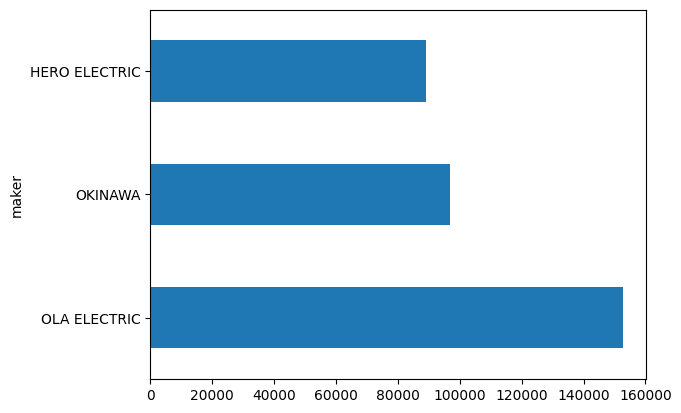

In [31]:
df_2Wheelers_2023.groupby("maker")["electric_vehicles_sold"].sum().nlargest(n=3).plot(kind="barh")

<Axes: ylabel='maker'>

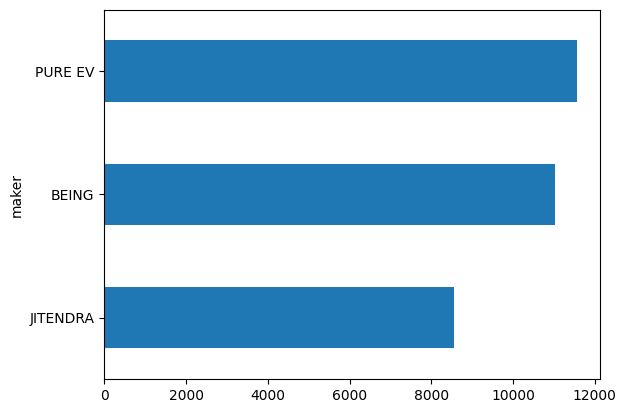

In [30]:
df_2Wheelers_2023.groupby("maker")["electric_vehicles_sold"].sum().nsmallest(n=3).plot(kind="barh")

## Top  and bottom 3 Makers for the fiscal years 2024 in terms of the number of 2-wheelers sold. ##

In [26]:
df_2Wheelers_2024 = df_makers[(df_makers["fiscal_year"]==2024) & (df_makers["vehicle_category"]=="2-Wheelers")]

In [27]:
df_2Wheelers_2024.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
527,01-Apr-23,2-Wheelers,OLA ELECTRIC,22548,2024,Q1
528,01-Apr-23,2-Wheelers,TVS,8654,2024,Q1
529,01-Apr-23,2-Wheelers,ATHER,7707,2024,Q1
530,01-Apr-23,2-Wheelers,BAJAJ,4043,2024,Q1
531,01-Apr-23,2-Wheelers,AMPERE,8767,2024,Q1


<Axes: ylabel='maker'>

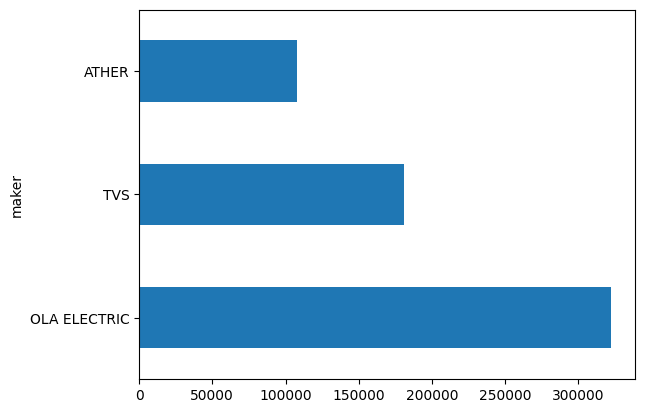

In [29]:
df_2Wheelers_2024.groupby("maker")["electric_vehicles_sold"].sum().nlargest(n=3).plot(kind="barh")

<Axes: ylabel='maker'>

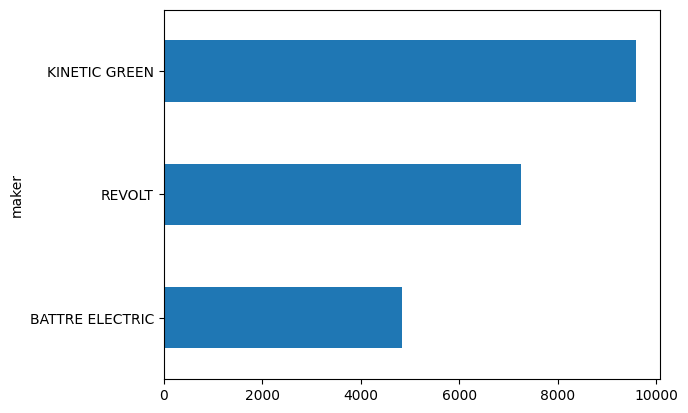

In [32]:
df_2Wheelers_2024.groupby("maker")["electric_vehicles_sold"].sum().nsmallest(n=3).plot(kind="barh")

## Top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. ##

In [33]:
df_state_2Wheeler_2024 =df_state[(df_state["fiscal_year"]==2024) & (df_state["vehicle_category"]=="2-Wheelers")]

In [34]:
df_state_2Wheeler_2024.head()


,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1631,01-Apr-23,Sikkim,2-Wheelers,0,465,2024,Q1
1633,01-Apr-23,Andaman & Nicobar Island,2-Wheelers,0,325,2024,Q1
1634,01-Apr-23,Arunachal Pradesh,2-Wheelers,0,971,2024,Q1
1635,01-Apr-23,Ladakh,2-Wheelers,0,43,2024,Q1
1639,01-Apr-23,Nagaland,2-Wheelers,0,560,2024,Q1


In [37]:
total = df_state_2Wheeler_2024["electric_vehicles_sold"].sum()
total

932692

<Axes: ylabel='electric_vehicles_sold'>

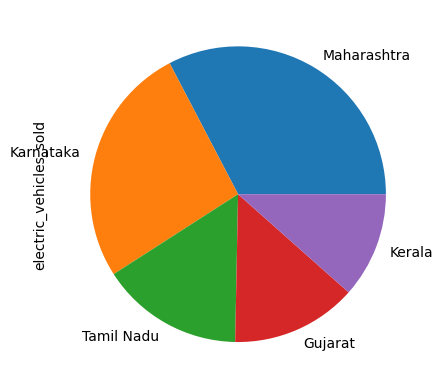

In [57]:
(df_state_2Wheeler_2024.groupby("state")["electric_vehicles_sold"].sum()/total*100).nlargest(n=5).plot(kind="pie")


In [48]:
df_state_4Wheeler_2024 =df_state[(df_state["fiscal_year"]==2024) & (df_state["vehicle_category"]=="4-Wheelers")]
df_state_4Wheeler_2024.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1632,01-Apr-23,Sikkim,4-Wheelers,0,439,2024,Q1
1636,01-Apr-23,Ladakh,4-Wheelers,0,219,2024,Q1
1637,01-Apr-23,Manipur,4-Wheelers,0,942,2024,Q1
1638,01-Apr-23,Mizoram,4-Wheelers,0,336,2024,Q1
1640,01-Apr-23,Andaman & Nicobar Island,4-Wheelers,1,122,2024,Q1


In [58]:
total_4Wheel = df_state_4Wheeler_2024["electric_vehicles_sold"].sum()
total_4Wheel

86901

<Axes: ylabel='electric_vehicles_sold'>

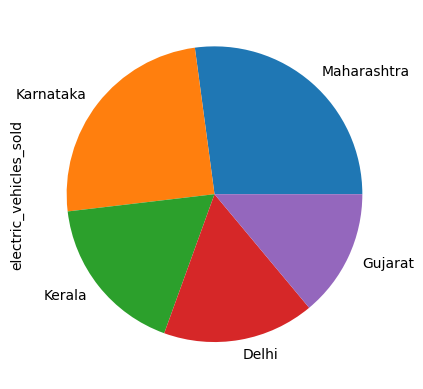

In [64]:
(df_state_4Wheeler_2024.groupby("state")["electric_vehicles_sold"].sum()/total_4Wheel*100).nlargest(n=5).plot(kind="pie")


## 3.States with negative penetration (decline) in EV sales from 2022 to 2024 ##

In [68]:
df_22 = df_state[(df_state["fiscal_year"]==2022)]

In [73]:
tot_22 = df_22["electric_vehicles_sold"].sum()

In [78]:
Penetration_rate_22 = df_22.groupby("state")["electric_vehicles_sold"].sum()/tot_22*100
Penetration_rate_22

state
Andaman & Nicobar Island     0.008114
Andhra Pradesh               5.136640
Arunachal Pradesh            0.000000
Assam                        0.269224
Bihar                        1.780933
Chandigarh                   0.151577
Chhattisgarh                 1.672137
DNH and DD                   0.012908
Delhi                        6.098101
Goa                          0.655726
Gujarat                      6.647981
Haryana                      2.185506
Himachal Pradesh             0.163378
Jammu and Kashmir            0.528859
Jharkhand                    1.000553
Karnataka                   15.899318
Kerala                       5.030057
Ladakh                       0.004426
Madhya Pradesh               2.919417
Maharashtra                 17.840310
Manipur                      0.009220
Meghalaya                    0.001475
Mizoram                      0.000000
Nagaland                     0.000369
Odisha                       3.502858
Puducherry                   0.270699
Punjab

In [69]:
df_24 = df_state[(df_state["fiscal_year"]==2024)]

In [79]:
tot_24=df_24["electric_vehicles_sold"].sum()
tot_24

1019593

In [80]:
Penetration_rate_24 = df_24.groupby("state")["electric_vehicles_sold"].sum()/tot_24*100
Penetration_rate_24

state
Andaman & Nicobar Island     0.003433
Andhra Pradesh               3.254534
Arunachal Pradesh            0.003040
Assam                        0.342980
Bihar                        1.477943
Chandigarh                   0.282171
Chhattisgarh                 2.799156
DNH and DD                   0.019420
Delhi                        4.582613
Goa                          1.059148
Gujarat                      8.273792
Haryana                      1.156638
Himachal Pradesh             0.102786
Jammu and Kashmir            0.223913
Jharkhand                    0.767953
Karnataka                   15.789536
Kerala                       7.251717
Ladakh                       0.003040
Madhya Pradesh               4.239241
Maharashtra                 19.338010
Manipur                      0.012358
Meghalaya                    0.013044
Mizoram                      0.026972
Nagaland                     0.000883
Odisha                       3.836629
Puducherry                   0.303847
Punjab

In [84]:
decline =Penetration_rate_24-Penetration_rate_22
decline[decline<0].sort_values()

state
Tamil Nadu                 -4.344897
Andhra Pradesh             -1.882106
Delhi                      -1.515488
Haryana                    -1.028868
Rajasthan                  -0.891359
Punjab                     -0.571643
Jammu and Kashmir          -0.304946
Bihar                      -0.302990
Jharkhand                  -0.232600
Uttarakhand                -0.145310
Karnataka                  -0.109782
Himachal Pradesh           -0.060592
Andaman & Nicobar Island   -0.004681
Ladakh                     -0.001385
Name: electric_vehicles_sold, dtype: float64

## 4.Quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024 ##

In [107]:
df_quarter_22 = df_makers[(df_makers["fiscal_year"]==2022) & (df_makers["vehicle_category"]=="4-Wheelers")].groupby(['maker','quarter'])["electric_vehicles_sold"].sum()
df_quarter_22

maker                quarter
BMW India            Q1            0
                     Q2            0
                     Q3            0
                     Q4            7
BYD India            Q1            0
                     Q2            0
                     Q3            1
                     Q4           32
Hyundai Motor        Q1           25
                     Q2           34
                     Q3           25
                     Q4           26
KIA Motors           Q1            0
                     Q2            0
                     Q3            0
                     Q4            0
MG Motor             Q1          285
                     Q2          798
                     Q3          411
                     Q4          153
Mahindra & Mahindra  Q1          355
                     Q2          651
                     Q3         1383
                     Q4         1653
Mercedes -Benz AG    Q1            5
                     Q2            5
         

In [111]:
df_quarter_23 = df_makers[(df_makers["fiscal_year"]==2023) & (df_makers["vehicle_category"]=="4-Wheelers")].groupby(['maker','quarter'])["electric_vehicles_sold"].sum()
df_quarter_23

maker                quarter
BMW India            Q1           22
                     Q2           44
                     Q3           45
                     Q4          174
BYD India            Q1           81
                     Q2          113
                     Q3          103
                     Q4          623
Hyundai Motor        Q1           75
                     Q2          155
                     Q3          191
                     Q4          155
KIA Motors           Q1            0
                     Q2            0
                     Q3          155
                     Q4           74
MG Motor             Q1          531
                     Q2          635
                     Q3         1165
                     Q4          946
Mahindra & Mahindra  Q1         2020
                     Q2         3164
                     Q3         3378
                     Q4         5243
Mercedes -Benz AG    Q1           14
                     Q2            7
         

In [112]:
df_quarter_24 = df_makers[(df_makers["fiscal_year"]==2024) & (df_makers["vehicle_category"]=="4-Wheelers")].groupby(['maker','quarter'])["electric_vehicles_sold"].sum()
df_quarter_24

maker                quarter
BMW India            Q1           184
                     Q2           203
                     Q3           423
                     Q4           268
BYD India            Q1           406
                     Q2           310
                     Q3           350
                     Q4           400
Hyundai Motor        Q1           292
                     Q2           390
                     Q3           370
                     Q4           338
KIA Motors           Q1            96
                     Q2            69
                     Q3            91
                     Q4            72
MG Motor             Q1          1493
                     Q2          2524
                     Q3          2190
                     Q4          2622
Mahindra & Mahindra  Q1         10911
                     Q2          5855
                     Q3          4264
                     Q4          2316
Mercedes -Benz AG    Q1            31
                     

 ## 5 .EV sales and penetration rates in Delhi compare to Karnataka for 2024##

In [140]:
df1 = df_state[(df_state["state"]=="Delhi") | (df_state["state"]=="Karnataka")]
df1
df2= df1[(df1["fiscal_year"]==2024)]
df2.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1650,01-Apr-23,Delhi,4-Wheelers,551,14861,2024,Q1
1657,01-Apr-23,Karnataka,4-Wheelers,762,22368,2024,Q1
1676,01-Apr-23,Delhi,2-Wheelers,2738,28590,2024,Q1
1683,01-Apr-23,Karnataka,2-Wheelers,9711,91491,2024,Q1
1715,01-May-23,Delhi,4-Wheelers,787,16609,2024,Q1


In [141]:
df2.state.unique()

array(['Delhi', 'Karnataka'], dtype=object)

In [143]:
df_24 = df_state[(df_state["fiscal_year"]==2024)]
df_24.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1631,01-Apr-23,Sikkim,2-Wheelers,0,465,2024,Q1
1632,01-Apr-23,Sikkim,4-Wheelers,0,439,2024,Q1
1633,01-Apr-23,Andaman & Nicobar Island,2-Wheelers,0,325,2024,Q1
1634,01-Apr-23,Arunachal Pradesh,2-Wheelers,0,971,2024,Q1
1635,01-Apr-23,Ladakh,2-Wheelers,0,43,2024,Q1


In [144]:
total = df_24["electric_vehicles_sold"].sum()
total

1019593

<Axes: xlabel='state'>

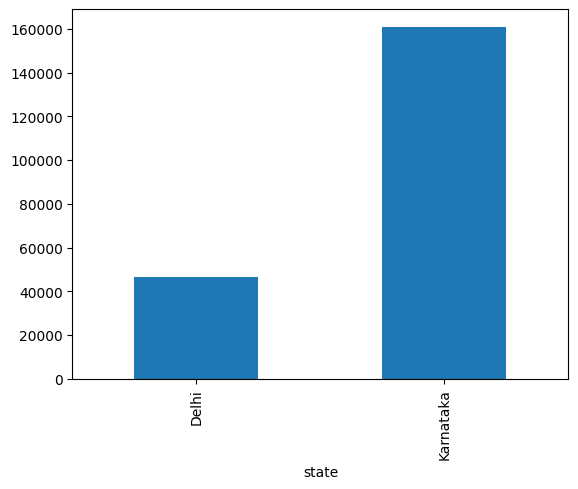

In [148]:
sales = df2.groupby("state")["electric_vehicles_sold"].sum()
sales.plot(kind="bar")

<Axes: ylabel='electric_vehicles_sold'>

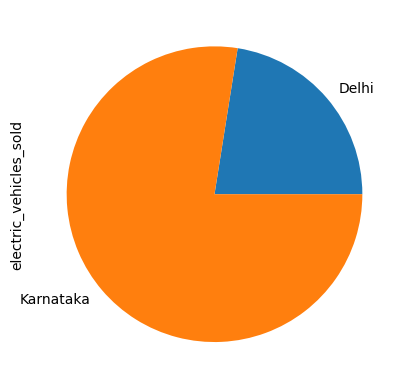

In [147]:
penetration_rate = sales/total*100
penetration_rate.plot(kind="pie")

## Compound annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.##

In [185]:
sales_22 = df_makers[(df_makers["fiscal_year"]==2022) & (df_makers["vehicle_category"]=="4-Wheelers")]
sum_sales_22 = sales_22.groupby("maker")["electric_vehicles_sold"].sum()
df_sale_22= sum_sales_22.reset_index()

In [186]:
df_sale_22

,maker,electric_vehicles_sold
0,BMW India,7
1,BYD India,33
2,Hyundai Motor,110
3,KIA Motors,0
4,MG Motor,1647
5,Mahindra & Mahindra,4042
6,Mercedes -Benz AG,26
7,PCA Automobiles,0
8,Tata Motors,12708
9,Volvo Auto India,4


In [164]:
sales_24 = df_makers[(df_makers["fiscal_year"]==2024) & (df_makers["vehicle_category"]=="4-Wheelers")]
sum_sales_24 =sales_24.groupby("maker")["electric_vehicles_sold"].sum()
sum_sales_24

maker
BMW India               1078
BYD India               1466
Hyundai Motor           1390
KIA Motors               328
MG Motor                8829
Mahindra & Mahindra    23346
Mercedes -Benz AG        291
PCA Automobiles         1533
Tata Motors            48181
Volvo Auto India         459
Name: electric_vehicles_sold, dtype: int64

In [188]:
df_sale_24 = sum_sales_24.reset_index()
df_sale_24

,maker,electric_vehicles_sold
0,BMW India,1078
1,BYD India,1466
2,Hyundai Motor,1390
3,KIA Motors,328
4,MG Motor,8829
5,Mahindra & Mahindra,23346
6,Mercedes -Benz AG,291
7,PCA Automobiles,1533
8,Tata Motors,48181
9,Volvo Auto India,459


In [233]:
df_sales_2224 = pd.merge (df_sale_22,df_sale_24,on="maker")

df_sales_2224


,maker,electric_vehicles_sold_x,electric_vehicles_sold_y
0,BMW India,7,1078
1,BYD India,33,1466
2,Hyundai Motor,110,1390
3,KIA Motors,0,328
4,MG Motor,1647,8829
5,Mahindra & Mahindra,4042,23346
6,Mercedes -Benz AG,26,291
7,PCA Automobiles,0,1533
8,Tata Motors,12708,48181
9,Volvo Auto India,4,459


In [235]:
df_sales_2224.rename(columns={'electric_vehicles_sold_x': 'sales_22', 'electric_vehicles_sold_y': 'sales_24'}, inplace=True)
df_sales_2224

,maker,sales_22,sales_24
0,BMW India,7,1078
1,BYD India,33,1466
2,Hyundai Motor,110,1390
3,KIA Motors,0,328
4,MG Motor,1647,8829
5,Mahindra & Mahindra,4042,23346
6,Mercedes -Benz AG,26,291
7,PCA Automobiles,0,1533
8,Tata Motors,12708,48181
9,Volvo Auto India,4,459


In [155]:
n = len(pd.unique(df_makers['fiscal_year']))
n

3

In [157]:
Operational_years = n-1
Operational_years

2

In [238]:
df_sales_2224.drop(df_sales_2224.loc[df_sales_2224["sales_22"]==0].index,inplace=True)

In [239]:
df_sales_2224


,maker,sales_22,sales_24
0,BMW India,7,1078
1,BYD India,33,1466
2,Hyundai Motor,110,1390
4,MG Motor,1647,8829
5,Mahindra & Mahindra,4042,23346
6,Mercedes -Benz AG,26,291
8,Tata Motors,12708,48181
9,Volvo Auto India,4,459


In [266]:
df_sales_2224['24/22']=(df_sales_2224['sales_24']/df_sales_2224['sales_22'])


In [268]:
import numpy as np
df_sales_2224['square']=np.sqrt((df_sales_2224['24/22']))

In [270]:
df_sales_2224['CAGR_new']= (df_sales_2224['square']-1)*100

In [277]:
df_new =df_sales_2224.drop(['CAGR','24/22','CAGR1','square','sales_22','sales_24'],axis=1)


In [278]:
df_new

,maker,CAGR_new
0,BMW India,1140.967365
1,BYD India,566.515134
2,Hyundai Motor,255.476633
4,MG Motor,131.530899
5,Mahindra & Mahindra,140.330055
6,Mercedes -Benz AG,234.549065
8,Tata Motors,94.714952
9,Volvo Auto India,971.214264


In [279]:
df_top_CAGR = df_new.nlargest(5, 'CAGR_new')

<Axes: xlabel='maker'>

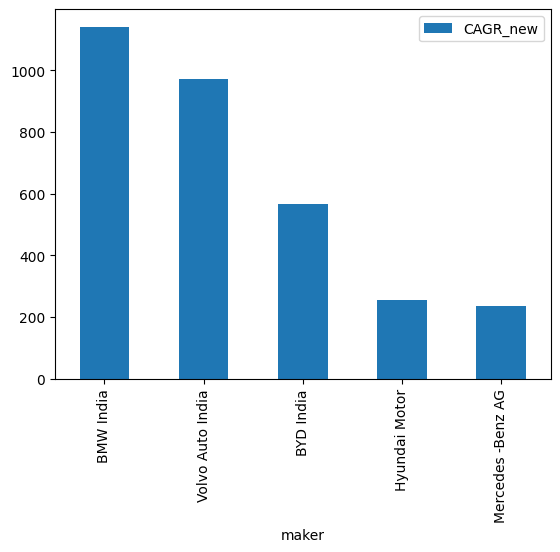

In [281]:
df_top_CAGR.plot(x='maker',kind="bar")

## Top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold ##

In [285]:
df_tot_veh_22 = df_state[(df_state['fiscal_year']==2022)]

In [288]:
df_sale_tot_veh_2022 = df_tot_veh_22.groupby("state")["total_vehicles_sold"].sum()

In [289]:
df_sale_tot_veh_2022

state
Andaman & Nicobar Island       5148
Andhra Pradesh               772748
Arunachal Pradesh             19929
Assam                        379450
Bihar                        892873
Chandigarh                    36954
Chhattisgarh                 390272
DNH and DD                    12413
Delhi                        401540
Goa                           48372
Gujarat                     1094872
Haryana                      528591
Himachal Pradesh              98266
Jammu and Kashmir            133943
Jharkhand                    411613
Karnataka                   1007894
Kerala                       689575
Ladakh                         2911
Madhya Pradesh               967179
Maharashtra                 1667002
Manipur                       36129
Meghalaya                     22193
Mizoram                       19439
Nagaland                      12852
Odisha                       479527
Puducherry                    42945
Punjab                       443232
Rajasthan             

In [290]:
df_tot_veh_24 = df_state[(df_state['fiscal_year']==2024)]

In [291]:
df_sale_tot_veh_2024 = df_tot_veh_24.groupby("state")["total_vehicles_sold"].sum()

In [292]:
df_sale_tot_veh_2024

state
Andaman & Nicobar Island       7203
Andhra Pradesh               782865
Arunachal Pradesh             27892
Assam                        547626
Bihar                       1132703
Chandigarh                    45147
Chhattisgarh                 503068
DNH and DD                    16400
Delhi                        606348
Goa                           78524
Gujarat                     1590987
Haryana                      732029
Himachal Pradesh             117084
Jammu and Kashmir            139359
Jharkhand                    495011
Karnataka                   1581988
Kerala                       638114
Ladakh                         3206
Madhya Pradesh              1286182
Maharashtra                 2293994
Manipur                       18422
Meghalaya                     36628
Mizoram                       27422
Nagaland                      16972
Odisha                       618149
Puducherry                    57692
Punjab                       574486
Rajasthan             

In [296]:
df_tot_veh =pd.merge(df_sale_tot_veh_2024,df_sale_tot_veh_2022,on='state').reset_index()

In [297]:
df_tot_veh 

,state,total_vehicles_sold_x,total_vehicles_sold_y
0,Andaman & Nicobar Island,7203,5148
1,Andhra Pradesh,782865,772748
2,Arunachal Pradesh,27892,19929
3,Assam,547626,379450
4,Bihar,1132703,892873
5,Chandigarh,45147,36954
6,Chhattisgarh,503068,390272
7,DNH and DD,16400,12413
8,Delhi,606348,401540
9,Goa,78524,48372


In [298]:
df_tot_veh.rename(columns={'total_vehicles_sold_x': 'sales_22', 'total_vehicles_sold_y': 'sales_24'}, inplace=True)
df_tot_veh

,state,sales_22,sales_24
0,Andaman & Nicobar Island,7203,5148
1,Andhra Pradesh,782865,772748
2,Arunachal Pradesh,27892,19929
3,Assam,547626,379450
4,Bihar,1132703,892873
5,Chandigarh,45147,36954
6,Chhattisgarh,503068,390272
7,DNH and DD,16400,12413
8,Delhi,606348,401540
9,Goa,78524,48372


In [301]:
df_tot_veh['tot_veh_24/22']=df_tot_veh['sales_22']/df_tot_veh['sales_24']

In [302]:
df_tot_veh['CAGR'] = ((df_tot_veh['tot_veh_24/22'].pow(1/2))-1)*100

In [303]:
df_tot_veh

,state,sales_22,sales_24,24/22,tot_veh_24/22,CAGR
0,Andaman & Nicobar Island,7203,5148,1.399184,1.399184,18.287115
1,Andhra Pradesh,782865,772748,1.013092,1.013092,0.652483
2,Arunachal Pradesh,27892,19929,1.399568,1.399568,18.303359
3,Assam,547626,379450,1.443210,1.443210,20.133672
4,Bihar,1132703,892873,1.268605,1.268605,12.632359
5,Chandigarh,45147,36954,1.221708,1.221708,10.530904
6,Chhattisgarh,503068,390272,1.289019,1.289019,13.534970
7,DNH and DD,16400,12413,1.321196,1.321196,14.943270
8,Delhi,606348,401540,1.510056,1.510056,22.884347
9,Goa,78524,48372,1.623336,1.623336,27.410196


In [309]:
df_State_CAGR = df_tot_veh.drop(['sales_22','sales_24','24/22','tot_veh_24/22'],axis=1)

In [315]:
df_state_CAGR = df_State_CAGR.nlargest(10, 'CAGR')
df_state_CAGR

,state,CAGR
21,Meghalaya,28.469075
9,Goa,27.410196
15,Karnataka,25.283582
8,Delhi,22.884347
27,Rajasthan,21.497380
10,Gujarat,20.545677
3,Assam,20.133672
22,Mizoram,18.771599
2,Arunachal Pradesh,18.303359
0,Andaman & Nicobar Island,18.287115


<Axes: xlabel='state'>

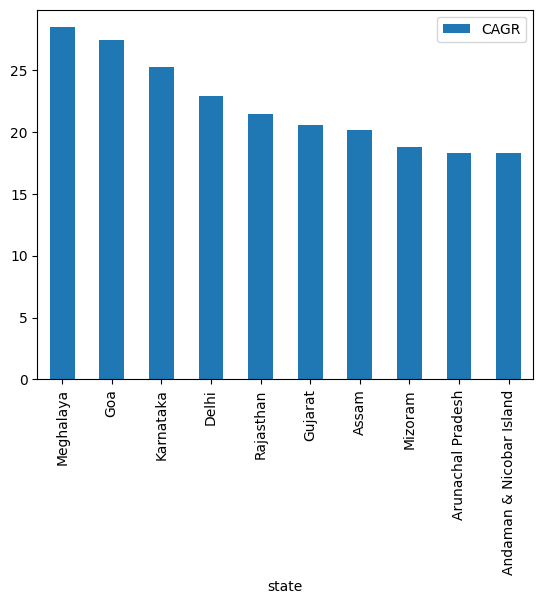

In [314]:
df_state_CAGR.plot(x='state',kind="bar")

## Peak and low season months for EV sales based on the data from 2022 to 2024 ##

In [325]:
df_state['month'] = pd.DatetimeIndex(df_state['date']).month
df_state

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter,month
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1,4
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1,4
2,01-Apr-21,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1,4
3,01-Apr-21,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1,4
4,01-Apr-21,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1,4
...,...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4,3
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4,3
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4,3
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4,3


<Axes: xlabel='month'>

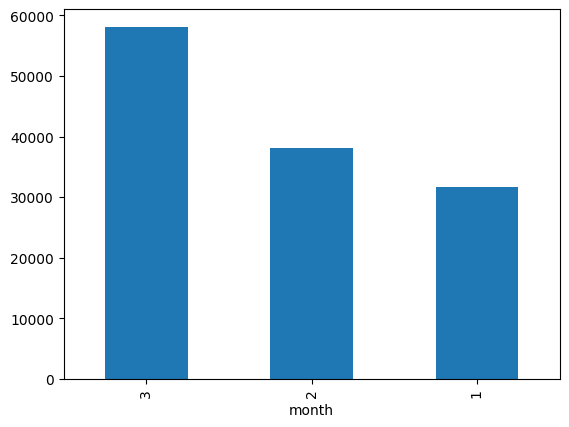

In [329]:
df_States_2022 = df_state[(df_state["fiscal_year"]==2022)]
df_peak_season_22 = df_States_2022.groupby("month")["electric_vehicles_sold"].sum().nlargest(n=3)
df_peak_season_22.plot(kind="bar")

<Axes: xlabel='month'>

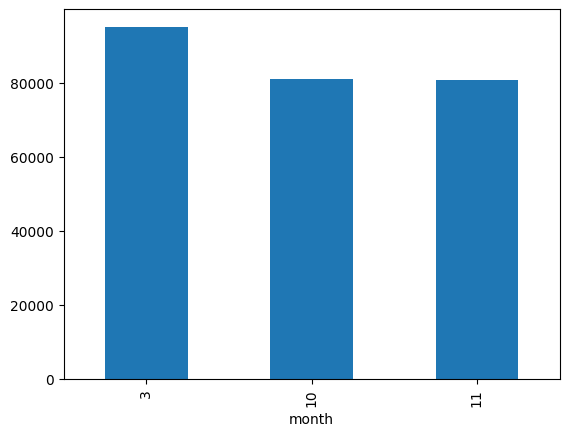

In [327]:
df_States_2023 = df_state[(df_state["fiscal_year"]==2023)]
df_peak_season_23 = df_States_2023.groupby("month")["electric_vehicles_sold"].sum().nlargest(n=3)
df_peak_season_23.plot(kind="bar")

<Axes: xlabel='month'>

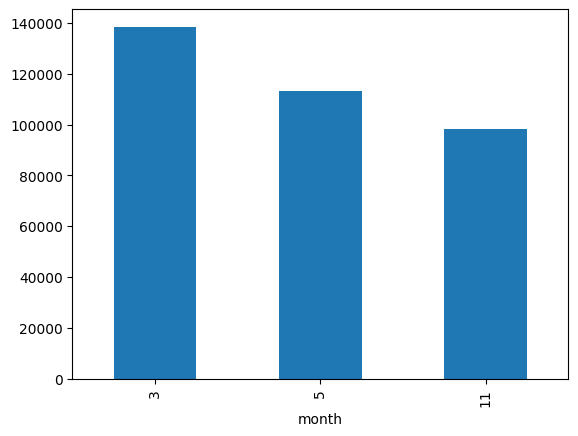

In [328]:
df_States_2024 = df_state[(df_state["fiscal_year"]==2024)]
df_peak_season_24 = df_States_2024.groupby("month")["electric_vehicles_sold"].sum().nlargest(n=3)
df_peak_season_24.plot(kind="bar")